# K Nearest Neighbour

This notebook was written to demo the kNN python implementation.

k-nearest neighbors (kNN) is a non-parametric method used in  classification. The input consists of the k closest training examples in the feature space. The output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
In kNN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors. k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until classification.

source: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

### Iris Dataset

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

This data sets consists of 3 different types of irises (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray. The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

source: https://en.wikipedia.org/wiki/Iris_flower_data_set

In [ ]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from kNearestNeighbors import kNearestNeighbor, accuracy

In [66]:
iris = datasets.load_iris()
X = iris.data  
y = iris.target

In [67]:
# For illustration purposes we will only be using the first two features in the dataset (sepal length, sepal width)
n_features = 2 
X_ = X[:, :n_features]
# We will also split the dataset into training and testing so we can evaluate the kNN classifier
X_trn, X_test, y_trn, y_test = train_test_split(X_, 
                                                y, 
                                                test_size=0.2, 
                                                random_state=0)


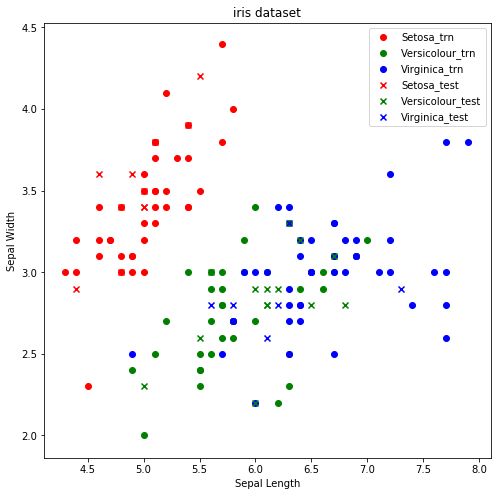

In [68]:
# a scatterplot displaying each species based on sepal length (x axis) and sepal length (y axis)
colours = ['red', 'green', 'blue']
legend = ['Setosa', 'Versicolour', 'Virginica']
classes = list(set(y))
f = plt.figure(figsize=(8, 8))
for i in classes:
    idx = np.where(y_trn == classes[i])
    plt.scatter(X_trn[idx, 0], 
                X_trn[idx, 1], 
                c=colours[i], 
                label=legend[i]+'_trn')

for i in classes:
    idx = np.where(y_test == classes[i])
    plt.scatter(X_test[idx, 0], 
                X_test[idx, 1], 
                c=colours[i], 
                label=legend[i]+'_test',
                marker='x')
    
    
plt.legend()
plt.title('iris dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [69]:
k = 8
knn = kNearestNeighbor(k=k)
knn.fit(X_trn, y_trn)
y_trn_pred = knn.predict(X_trn)
print('training accuracy: {}'.format(accuracy(y_trn_pred, y_trn)))
y_test_pred = knn.predict(X_test)
print('test accuracy: {}'.format(accuracy(y_test_pred, y_test)))

training accuracy: 0.8666666666666667
training accuracy: 0.8666666666666667
test accuracy: 0.6


In [ ]:
from matplotlib.colors import ListedColormap
h = .02 # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
colours = ['red', 'green', 'blue']

pad = 0.5
x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array(Z).reshape(xx.shape)
plt.figure(figsize=(6, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


for i in classes:
    idx = np.where(y_trn == classes[i])
    plt.scatter(X_trn[idx, 0], 
                X_trn[idx, 1], 
                c=colours[i], 
                label=legend[i],
                marker='o', s=20)

for i in classes:
    idx = np.where(y_test == classes[i])
    plt.scatter(X_test[idx, 0], 
                X_test[idx, 1], 
                c=colours[i], #label=legend[i],
                marker='x', s=20)
    
plt.legend()
plt.title('iris dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')


plt.title("kNN classification (k = {}) - training set (o), test set (x)"
          .format(k))

plt.show()